## CHX olog link:
https://logbook.nsls2.bnl.gov/11-ID/#41952_1

## Just run this cell for load data analysis packages

In [114]:
from filestore.path_only_handlers import RawHandler 

from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
#%reset -f  #for clean up things in the memory

from databroker import DataBroker as db, get_images, get_table, get_events, get_fields

def norm_y(y ):
    return (y - y.min()) / (y.max() - y.min())

CYCLE = '2017_1'
username = getpass.getuser()
#username = 'commissioning'
#username = "colosqui"   #provide the username to force the results to save in that username folder
data_dir0 = os.path.join('/XF11ID/analysis/', CYCLE, username, 'Results/')
##Or define data_dir here, e.g.,#data_dir = '/XF11ID/analysis/2016_2/rheadric/test/'
os.makedirs(data_dir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % data_dir0)

data_dir = data_dir0

detector = 'xray_eye3_image'
#get_fields( db[uid] )

Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_1/chubar/Results/


## change uid here to reterive data

In [79]:

uid_slit = 'c95324' #count : 1 ['c95324'] (scan num: 11587) (Measurement: 0.250 mm V MBS, bare lattice coupling 2 nm H 8.8 pm V )
uid_scan = '929cc4'  #dscan : s4_yc -0.200 0.200 401 ['929cc4'] (scan num: 11589)



#a new cycle
uid_slit = 'd246fc' #count : 1 ['d246fc'] (scan num: 11600) (Measurement: B Fiber after scans, bare lattice coupling 2 nm H 8.5 pm V )
uid_slit = '343c67' #count : 1 ['343c67'] (scan num: 11601) (Measurement: Flat field after scans, bare lattice coupling 2 nm H 8.5 pm V )
uid_slit = '556c40' #count : 1 ['556c40'] (scan num: 11602) (Measurement: Flat field, bare lattice coupling 30 pm V )
uid_slit = '0a4af0'  #count : 1 ['0a4af0'] (scan num: 11603) (Measurement: B fiber, bare lattice coupling 30 pm V )
uid_scan = 'd90223'  #dscan : s4_yc -0.300 0.300 601 ['d90223'] (scan num: 11604)



uid_slit = '31a8fc' #count : 1 ['31a8fc'] (scan num: 11594) (Measurement: B Fiber, bare lattice coupling 2 nm H 8.8 pm V )
#uid_scan = 'babda7' #dscan : s4_yc -0.200 0.200 21 ['babda7'] (scan num: 11595)
uid_scan =  '1af169' #dscan : s4_yc -0.200 0.200 401 ['1af169'] (scan num: 11597)

## get data here

In [115]:
imgs_slit = get_images( db[uid_slit], detector  )
imgs_scan = get_images( db[uid_scan], detector  )
data_scan_roi = np.array( get_table( db[uid_scan],  fields = ['xray_eye3_stats1_total'],  )['xray_eye3_stats1_total'] )


In [131]:
#show_img( np.array(imgs_scan[100]), vmin=.1, vmax= 10, logs=True,
#         image_name= str(uid_scan) + '_img',  save=True, path=data_dir) 

## plot data here

<IPython.core.display.Javascript object>


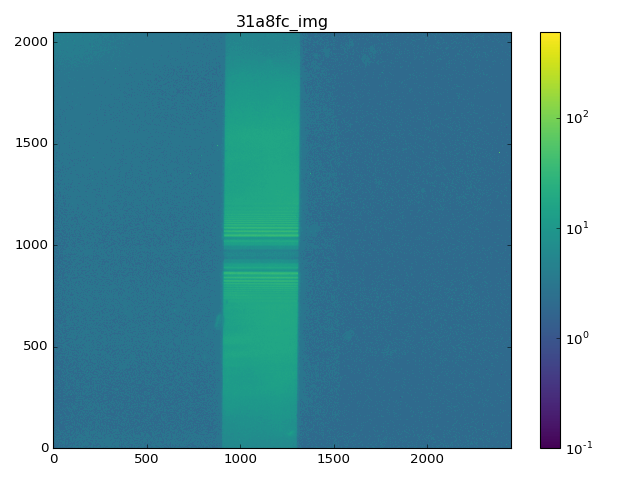

In [116]:
ax = plt.subplots()
show_img( imgs_slit[0], ax=ax, vmin=.1, vmax= 600, logs=True,
         image_name= str(uid_slit) + '_img',  save=True, path=data_dir) 

## do some analysis here

In [117]:
data_slit = np.array( imgs_slit[0], dtype = float )
data_slit_cut = np.average(   data_slit[:, 1000:1001],  axis=1)
yslit_norm = norm_y( data_slit_cut )
xslit = 0.705 * 0.001* np.arange(len(yslit_norm))   

In [118]:


yscan_roi_norm  = norm_y(  data_scan_roi )
xscan_roi =  np.arange(len( yscan_roi_norm )) * 0.001   + 0.486


<IPython.core.display.Javascript object>


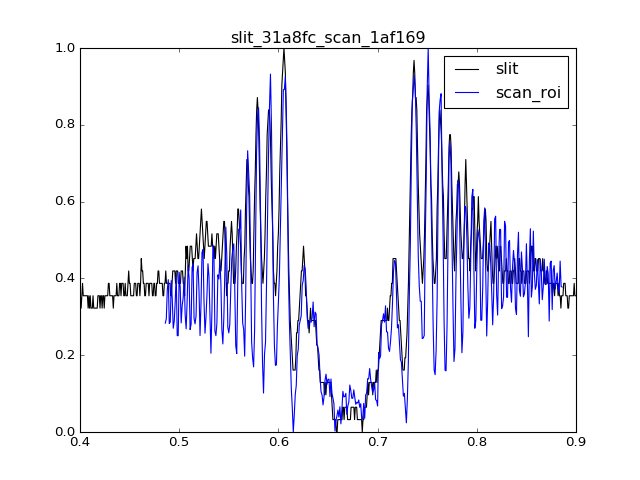

(0.4, 0.9)

In [119]:
fig, ax = plt.subplots( )
plot1D( x=  xslit , y= yslit_norm, ax = ax, ls='-', marker='', c='k', legend='slit' )
#plot1D( x=  xscan , y= yscan_norm, ax = ax, ls='-', marker='', c='r', legend='scan' )
plot1D( x=  xscan_roi , y= yscan_roi_norm, ax = ax, ls='-', marker='', c='b', legend='scan_roi' )
ax.set_title( 'slit_%s_scan_%s'%(uid_slit, uid_scan) )
plt.savefig( data_dir + 'slit_%s_scan_%s.png'%(uid_slit, uid_scan))

ax.set_xlim( 0.4, 0.9)

## save data here

In [120]:
np.savetxt( data_dir + 'slit_%s.txt'%uid_slit, data_slit_cut   )
np.savetxt( data_dir + 'data_scan_%s.txt'%uid_scan, data_scan_roi )